In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd
from ipywidgets import interact
import seaborn as sns
#import ptitprince as pt
import re #I import this library 'cause I need to deal with regular expressions
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
#from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from category_encoders import TargetEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer # para usar Yeo-Johnson
from scipy.stats import skew
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
#Here I call the files of my second dataset in order to use it on the CoderHouse data science project
file1="bands.csv"
file2="reviews.csv"
file3="albums.csv"

#Here I read the csv files and define the dataframes
bands=pd.read_csv(file1)
reviews=pd.read_csv(file2)
albums=pd.read_csv(file3)
Spotify_file='Spotify_extracted.csv'
Spotify_df=pd.read_csv(Spotify_file)
newDb="death_metal.csv"
newDBdf=pd.read_csv(newDb)

## Resumen

En las últimas décadas, la música extrema y sus subgéneros han experimentado transformaciones significativas, con escenas de distintos países aportando innovaciones en un mercado competitivo frente al consumo masivo de música popular. En Colombia, el mercado del metal ha visto surgir bandas con altos niveles de producción y propuestas ambiciosas, buscando forjar una audiencia para sus sonidos únicos. Elementos críticos para la supervivencia y fortalecimiento de estos géneros incluyen la crítica especializada, la opinión de los aficionados, la popularidad en plataformas de streaming y la difusión mediática.

Este estudio busca entender y explorar las relaciones complejas entre diversas características de bandas de música extrema, con el objetivo de desarrollar herramientas predictivas. Se ha utilizado un dataset disponible en Kaggl[ZJF Kaggle](https://www.kaggle.com/datasets/zhangjuefei/death-metal) e), que incluye tres archivos CSV con información básica sobre bandas (nombre, procedencia, género), álbumes (nombre, año de lanzamiento) y críticas (puntuación crítica sobre 1.0). Además, se empleó un dataset complementari [PATRICK KLEIN Kaggle](https://www.kaggle.com/datasets/patkle/metal-music-ratings-and-review-counts-from-amazon)e) que presenta datos obtenidos de Amazon, incluyendo el conteo de reseñas, y datos de la API de Spotify, donde se extrajo un conjunto limitado de registros (1.000).

El análisis inicial buscó identificar tendencias entre la calificación crítica de álbumes de Death Metal y variables como el número promedio de álbumes lanzados, el conteo de reseñas, la popularidad en Spotify y la decisión de las bandas de explorar otros géneros. Sin embargo, a pesar de la manipulación de datos, el estudio de distribuciones de puntuaciones y el tratamiento de outliers mediante la transformación de Yeo-Johnson, ninguno de los regresores implementados (incluyendo regresión lineal, polinomial, a ley de potencias, árbol de decisión y random forest) logró explicar más del 21% de la varianza de los datos. No se identificaron tendencias o relaciones claras entre las variables. Por lo tanto, se considera la posibilidad de adquirir características adicionales y explorar algoritmos más sofisticados en investigaciones futuras.
  

## SOBRE ESTE NOTEBOOK (IMPORTANTE)

Este notebook corresponde a un intento de corregir y mejorar el desempeño de los algoritmos de regresión despúes de haber encontrado algunos errores de planteamiento en algunos agrupamientos de datos que parecia ser la explicación inicial del desempeño pobre de los regresores implementados en los notebooks "Data_Wrangling_Sanchez_Ruiz", "Data_StoryTelling_Sanchez_Ruiz", "Ev_ML_Sanchez_Ruiz" y "spotifyApiConnection" Con el fin de clarificar el trabajo realizado en cada notebook para quien lea el presente trabajo, se aclara lo efectuado en cada notebook:

1. **"Data_Wrangling_Sanchez_Ruiz"** este notebook contiene todo el tratamiento de datos original del dataset de Kaggle que contiene los archivos de reviews, albums y bandas de Death Metal hasta la fecha de 2013. En este notebook se hizo uso de expresiones regulares para extraer del feature "descripción" las transiciones de género que efectuaron las bandas presentes en el dataset, y se creó un booleano para identificar dichos cambios. Se cruzaron las tres tablas para añadir los scores crtícicos usando funciones de agregación por album. Es aquí dónde aparece el primer y más grande error en el EDA y es que no se tuvo en cuenta que una banda fuera de tener varios albums, dicho album pude tener varias reviews o simplemente no tener ninguna review o que sus albums no se incluyan en la tabla albums. Dicho error se corrije en el presente notebook, pero lleva a una reducción del volumen de datos muy sensible. En dicho notebook se intenta realizar una regresión lineal, polinomial y de ley de potencias con resultados muy pobres.
2. **"Data_StoryTelling_Sanchez_Ruiz"** como su titulo lo sugiere, el notebook está centrado en hacer Story Telling a partir de los algoritmos de regresión usados previamente.
3. **"spotifyApiConnection"** este notebook contiene una serie de funciones desarrolladas para extraer data de la API de Spotify, actualmente lo estoy usando para otro proyecto donde busco estudiar carácteristicas sonoras de bandas de metal colombianas.
4. **"Ev_ML_Sanchez_Ruiz"** este notebook contiene el feature engineering efectuado luego de obtener un muy limitado número de registros de la API de Spotify: se usaron distribuciones log normal y beta para realizar la imputación de datos ajustando los parámetros de estas distribuciones a las medidas de tendencia central de los features "Popularidad" y "Número de Seguidores" Los resultados de los regresores siguieron siendo en demasía pobres a pesar de las correciones implementadas.




In [77]:
bands.head()

,id,name,country,status,formed_in,genre,theme,active
0,1,('M') Inc.,United States,Unknown,2009.0,Death Metal,NaN,2009-?
1,2,(sic),United States,Split-up,1993.0,Death Metal,NaN,1993-1996
2,3,.F.O.A.D.,France,Active,2009.0,Death Metal,Life and Death,2009-present
3,4,100 Suns,United States,Active,2004.0,Death Metal,NaN,2004-present
4,5,12 Days of Anarchy,United States,Split-up,1998.0,Death Metal,Anarchy,1998-2002


In [78]:
reviews.head()

,id,album,title,score,content
0,1,4,The Killer Count Just Keeps Rising,0.88,When I first threw this on I really didnt know...
1,2,5,A gem of heterogeneous death metal...,0.96,Several years ago I bought from a band member|...
2,3,8,Fantasic| if mostly for its influences,0.83,What a wonderful release this is. ‘Vox Fatum’ ...
3,4,45,A rare| lost hidden gem,0.80,Picture this: crushing| brutal death metal| wi...
4,5,54,Pure| but flayed and covered in soot,0.92,Abhordium's When Depravity Incarnates is an ex...


In [5]:
reviews.duplicated(subset='id',keep='first').sum()

0

In [79]:
albums.head()

,id,band,title,year
0,1,1,Taste the Hate,2014
1,2,3,The Bringer of Death,2014
2,3,4,Deception| Calculate What You Can't See,2005
3,4,7,Inti Huacay,1998
4,5,7,Génesis & horror,2002


In [7]:
albums.loc[albums['band']==37723]

,id,band,title,year
28048,28049,37723,Nightmares of the Autumn Succubus,2004
28049,28050,37723,Return to Capcomia,2004
28050,28051,37723,The 5th Season,2004
28051,28052,37723,October Harvest,2004
28052,28053,37723,Cemetery Rain,2004
28053,28054,37723,Winterasylum,2005
28054,28055,37723,Resonate,2005
28055,28056,37723,Traverse thru Realms of Nevermore,2005
28056,28057,37723,Cemetery Rain II: The Melodic Darkness Diary,2005
28057,28058,37723,Weeping Redolence,2005


In [80]:
Spotify_df.head()

,Name,Genres,Popularity,Followers,Artist_URI,validation,valid
0,Slayer,"alternative metal, death metal, groove metal, ...",64,3717516,spotify:artist:1IQ2e1buppatiN1bxUVkrk,False,False
1,Gojira,"alternative metal, french death metal, french ...",61,1239549,spotify:artist:0GDGKpJFhVpcjIGF8N6Ewt,True,True
2,Currents,"melodic metalcore, metalcore, progressive deat...",58,187066,spotify:artist:5pqvAI85RMxL9K0xHvSwGu,False,False
3,In Flames,"alternative metal, gothenburg metal, melodic d...",61,1127923,spotify:artist:57ylwQTnFnIhJh4nu4rxCs,True,True
4,Lorna Shore,"blackened deathcore, melodic metalcore, sympho...",57,540632,spotify:artist:6vXYoy8ouRVib302zxaxFF,False,False


In [81]:
newDBdf.head()

,artist,asin,media,review_count,star_rating,title,year,Unnamed: 7,validation
0,Ministry,B006NTPEXA,"MP3 Music,Audio CD",680,4.8,Psalm 69,1992,NaN,False
1,Mercyful Fate,B004ZW1OW2,"Vinyl,MP3 Music,Audio CD",678,4.8,Don't Break The Oath (Picture Disc),1984,NaN,False
2,Gojira,B00F8PPADE,"Vinyl,MP3 Music,Audio CD",633,4.8,Way of All Flesh,2013,NaN,True
3,Carcass,B000024AZV,"Audio CD,MP3 Music,Vinyl,Audio, Cassette",626,4.8,Heartwork,2013,NaN,True
4,Suicidal Tendencies,B004WQZP1M,"MP3 Music,Audio CD",611,4.8,Suicidal Tendencies (Original Vinyl Edition),1983,NaN,False


In [10]:
bands.loc[bands['name']=='Masacre']

,id,name,country,status,formed_in,genre,theme,active
5752,5753,Masacre,Colombia,Active,1988.0,Death Metal,Colombian Violence| War| Anti-Religion,1988-present
23446,23447,Masacre,Finland,Split-up,NaN,Death/Thrash Metal,NaN,NaN


In [11]:
reviews.loc[reviews['album']==3260]

,id,album,title,score,content
2651,2652,3260,Death Reigns Supreme,0.81,In issuing a suitably battering assault that r...
2652,2653,3260,These guys know what they are doing!,0.92,Masacre is maybe the most important colombian ...


In [12]:
albums.loc[albums['title']=='Total Death']

,id,band,title,year
3259,3260,5753,Total Death,2004
23305,23306,34134,Total Death,2015
26544,26545,37094,Total Death,1996


<Axes: xlabel='album', ylabel='score'>

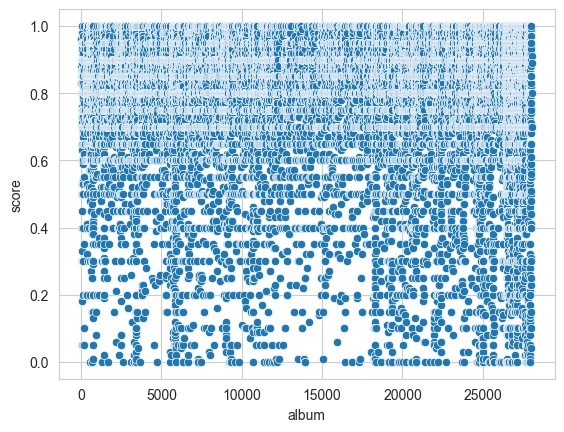

In [13]:
sns.scatterplot(data=reviews,x='album',y='score')

In [14]:
bands.columns

Index(['id', 'name', 'country', 'status', 'formed_in', 'genre', 'theme',
       'active'],
      dtype='object')

In [15]:
Spotify_df.columns

Index(['Name', 'Genres', 'Popularity', 'Followers', 'Artist_URI'], dtype='object')

In [16]:
newDBdf.columns

Index(['artist', 'asin', 'media', 'review_count', 'star_rating', 'title',
       'year', 'Unnamed: 7'],
      dtype='object')

In [17]:
bands.loc[bands['status']=='Split-up']

,id,name,country,status,formed_in,genre,theme,active
1,2,(sic),United States,Split-up,1993.0,Death Metal,NaN,1993-1996
4,5,12 Days of Anarchy,United States,Split-up,1998.0,Death Metal,Anarchy,1998-2002
8,9,6 Feet Under,Germany,Split-up,NaN,Death Metal,NaN,NaN
10,11,7th Delirium,Spain,Split-up,1998.0,Death Metal,NaN,1998-?
11,12,7th Gate,Austria,Split-up,NaN,Death Metal,NaN,NaN
...,...,...,...,...,...,...,...,...
37703,37704,Kalögena,Germany,Split-up,1993.0,Death/Thrash Metal with Gothic influences (ear...,Fun| Social| Fantasy| Horror,1993-?
37705,37706,Massacra,France,Split-up,1986.0,Death/Thrash Metal (1986-1992)| Heavy/Thrash M...,Genocide| Killing| Violence| Destruction,1986-1997
37710,37711,St. Valentine's Day,Ukraine,Split-up,NaN,Doom/Death Metal (early)| Doom/Post-Metal/Elec...,NaN,NaN
37713,37714,Theatre of Tragedy,Norway,Split-up,1993.0,Gothic/Doom/Death Metal (early)| Industrial/El...,Beauty| Darkness| Love| Life,1993 (as Suffering Grief)| 1993 (as La Reine N...


In [18]:
BANDS_DF=bands[['id','name','country','status','genre',]]

In [82]:
BANDS_DF.head()

,id,name,country,status,genre
0,1,('M') Inc.,United States,Unknown,Death Metal
1,2,(sic),United States,Split-up,Death Metal
2,3,.F.O.A.D.,France,Active,Death Metal
3,4,100 Suns,United States,Active,Death Metal
4,5,12 Days of Anarchy,United States,Split-up,Death Metal


## Cruce de datasets originales con extraídos por list comprehension

In [20]:
Spotify_df['validation']=[True if x in BANDS_DF.name.values else False for x in Spotify_df.Name]

In [21]:
Spotify_df

,Name,Genres,Popularity,Followers,Artist_URI,validation
0,Slayer,"alternative metal, death metal, groove metal, ...",64,3717516,spotify:artist:1IQ2e1buppatiN1bxUVkrk,False
1,Gojira,"alternative metal, french death metal, french ...",61,1239549,spotify:artist:0GDGKpJFhVpcjIGF8N6Ewt,True
2,Currents,"melodic metalcore, metalcore, progressive deat...",58,187066,spotify:artist:5pqvAI85RMxL9K0xHvSwGu,False
3,In Flames,"alternative metal, gothenburg metal, melodic d...",61,1127923,spotify:artist:57ylwQTnFnIhJh4nu4rxCs,True
4,Lorna Shore,"blackened deathcore, melodic metalcore, sympho...",57,540632,spotify:artist:6vXYoy8ouRVib302zxaxFF,False
...,...,...,...,...,...,...
995,Cleansing of the Temple,"christian death metal, christian deathcore",5,1315,spotify:artist:4nNgrGNSI4M9ODTMH5MdNI,False
996,Sentient Horror,swedish death metal,7,6037,spotify:artist:4MNbashXmMvEKIre76REzX,False
997,Purulence,"british death metal, slam death metal",6,2317,spotify:artist:6n2vNeCnk8otr3DpmS6osE,True
998,Emasculated Vituperation,slam death metal,7,916,spotify:artist:6JWlwpjP9WMxELrxX73n4h,False


In [22]:
BANDS_DF.loc[BANDS_DF['name']=='Lorna Shore']

,id,name,country,status,genre


In [23]:
false_Rows=Spotify_df[Spotify_df['validation']==False]
false_Rows

,Name,Genres,Popularity,Followers,Artist_URI,validation
0,Slayer,"alternative metal, death metal, groove metal, ...",64,3717516,spotify:artist:1IQ2e1buppatiN1bxUVkrk,False
2,Currents,"melodic metalcore, metalcore, progressive deat...",58,187066,spotify:artist:5pqvAI85RMxL9K0xHvSwGu,False
4,Lorna Shore,"blackened deathcore, melodic metalcore, sympho...",57,540632,spotify:artist:6vXYoy8ouRVib302zxaxFF,False
5,Slaughter to Prevail,"russian metal, russian metalcore, slamming dea...",56,551299,spotify:artist:24Oiw7BlvO1BETecDLJt6m,False
6,Emmure,"deathcore, melodic metalcore, metalcore, nu-me...",53,329282,spotify:artist:1C62FV9Cltn9L4c9jAwCyk,False
...,...,...,...,...,...,...
993,The Contradiction,"blackened deathcore, progressive metalcore",7,1664,spotify:artist:1bLy7ijLaJ9G3WLE1ax4pZ,False
994,Dysrhythmia,"dissonant death metal, instrumental rock, jazz...",7,8386,spotify:artist:27kqsn8A5Ab4I3FLrtZFDh,False
995,Cleansing of the Temple,"christian death metal, christian deathcore",5,1315,spotify:artist:4nNgrGNSI4M9ODTMH5MdNI,False
996,Sentient Horror,swedish death metal,7,6037,spotify:artist:4MNbashXmMvEKIre76REzX,False


In [24]:
newDBdf['validation']=[True if x in BANDS_DF.name.values else False for x in newDBdf.artist]
newDBdf

,artist,asin,media,review_count,star_rating,title,year,Unnamed: 7,validation
0,Ministry,B006NTPEXA,"MP3 Music,Audio CD",680,4.8,Psalm 69,1992,NaN,False
1,Mercyful Fate,B004ZW1OW2,"Vinyl,MP3 Music,Audio CD",678,4.8,Don't Break The Oath (Picture Disc),1984,NaN,False
2,Gojira,B00F8PPADE,"Vinyl,MP3 Music,Audio CD",633,4.8,Way of All Flesh,2013,NaN,True
3,Carcass,B000024AZV,"Audio CD,MP3 Music,Vinyl,Audio, Cassette",626,4.8,Heartwork,2013,NaN,True
4,Suicidal Tendencies,B004WQZP1M,"MP3 Music,Audio CD",611,4.8,Suicidal Tendencies (Original Vinyl Edition),1983,NaN,False
...,...,...,...,...,...,...,...,...,...
6305,VARIOUS ARTISTS,B009EFHM30,Audio CD,6,3.4,Gothic Spirits 16 / Various,2013,NaN,False
6306,Saturnus,B0077U70LI,"Audio CD,Audio CD",6,3.4,For The Loveless Lonely Nights 2010 Re-release,2012,NaN,True
6307,Valensia,B000P159AU,Audio CD,6,3.4,Voodoo Music Box,NaN,NaN,False
6308,Spitfire,B00000IKIL,"Audio CD,MP3 Music",11,3.3,The Dead Next Door,1999,NaN,False


In [25]:
BANDS_DF.loc[BANDS_DF['name']=='Mercyful Fate']

,id,name,country,status,genre


In [26]:
newDBdf.loc[newDBdf['artist']=='Gojira']

,artist,asin,media,review_count,star_rating,title,year,Unnamed: 7,validation
2,Gojira,B00F8PPADE,"Vinyl,MP3 Music,Audio CD",633,4.8,Way of All Flesh,2013,NaN,True
43,Gojira,B002N9MJS2,"Audio CD,MP3 Music,Vinyl",1151,4.8,From Mars to Sirius,2014,NaN,True
142,Gojira,B002MT3CRA,"Audio CD,MP3 Music,Vinyl",338,4.8,Terra Incognita,2009,NaN,True
148,Gojira,B000MM1EPG,"Audio CD,MP3 Music,Vinyl",321,4.8,Link,2007,NaN,True


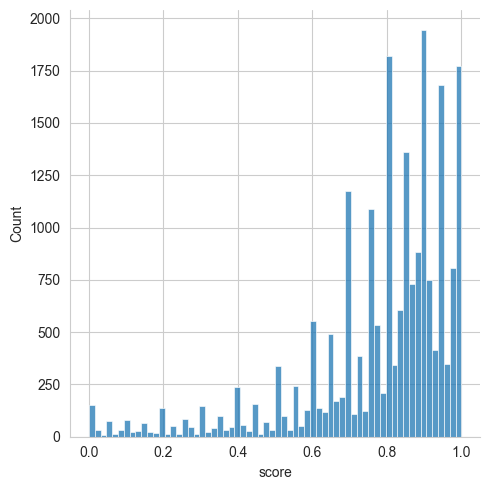

In [27]:
sns.displot(data=reviews['score'])

## Funciones de Agrupación Correctas

In [28]:
df_reviews=reviews.copy()
df_reviews.drop(columns=['content'],axis=1,inplace=True)
df_reviews_avg = df_reviews.groupby('album').agg({
    'id': 'first',  # Tomar el primer valor de 'id'
    'title': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,  # Tomar el valor más frecuente de 'title'
    'score': 'mean'  # Calcular la media de 'score'
}).reset_index()

In [29]:
df_reviews_avg

,album,id,title,score
0,4,1,The Killer Count Just Keeps Rising,0.88
1,5,2,A gem of heterogeneous death metal...,0.96
2,8,3,Fantasic| if mostly for its influences,0.83
3,45,4,A rare| lost hidden gem,0.80
4,54,5,Pure| but flayed and covered in soot,0.92
...,...,...,...,...
7900,28058,21505,What Goth Metal Should Sound Like,0.91
7901,28061,21506,Delightful,0.89
7902,28065,21507,Frozen Mist White Noise Paranormal,0.80
7903,28066,21509,Frozen Mist Anomalies Of The Forest,0.80


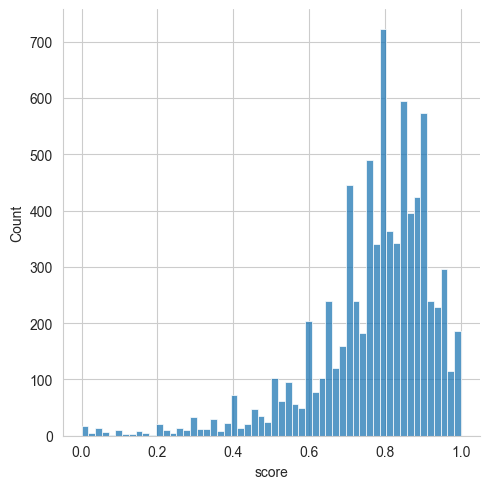

In [30]:
sns.displot(data=df_reviews_avg['score'])

In [31]:
df_reviews_avg.duplicated(subset='album',keep='first').sum()

0

In [32]:
albums

,id,band,title,year
0,1,1,Taste the Hate,2014
1,2,3,The Bringer of Death,2014
2,3,4,Deception| Calculate What You Can't See,2005
3,4,7,Inti Huacay,1998
4,5,7,Génesis & horror,2002
...,...,...,...,...
28064,28065,37723,White Noise Paranormal,2010
28065,28066,37723,Anomalies of the Forest,2011
28066,28067,37723,Mother Earth Pantheon,2012
28067,28068,37723,Paganwinds,2014


In [33]:
BANDS_DF

,id,name,country,status,genre
0,1,('M') Inc.,United States,Unknown,Death Metal
1,2,(sic),United States,Split-up,Death Metal
2,3,.F.O.A.D.,France,Active,Death Metal
3,4,100 Suns,United States,Active,Death Metal
4,5,12 Days of Anarchy,United States,Split-up,Death Metal
...,...,...,...,...,...
37718,37719,Gladiator,Slovakia,Active,Death/Thrash Metal (1988-93)| Grunge/Hard Rock...
37719,37720,Innersight,Hungary,Active,Post-Rock (early)| Progressive Death Metal (mi...
37720,37721,Lunarsapian,International,Active,Black/Death/Doom Metal (early)| Drone/Dark Amb...
37721,37722,Subconscious,Germany,Active,Progressive Thrash/Death Metal (1992| 2002-pre...


In [34]:
df_reviews_avg.columns

Index(['album', 'id', 'title', 'score'], dtype='object')

In [35]:
BANDS_DF.columns

Index(['id', 'name', 'country', 'status', 'genre'], dtype='object')

In [36]:
albums.columns

Index(['id', 'band', 'title', 'year'], dtype='object')

In [37]:
merged_df = pd.merge(df_reviews_avg, albums, left_on='album', right_on='id', suffixes=('_review', '_album'))
merged_df = pd.merge(merged_df, BANDS_DF, left_on='band', right_on='id', suffixes=('', '_band'))

In [38]:
merged_df

,album,id_review,title_review,score,id_album,band,title_album,year,id,name,country,status,genre
0,4,1,The Killer Count Just Keeps Rising,0.88,4,7,Inti Huacay,1998,7,1917,Argentina,Active,Death Metal
1,5,2,A gem of heterogeneous death metal...,0.96,5,7,Génesis & horror,2002,7,1917,Argentina,Active,Death Metal
2,8,3,Fantasic| if mostly for its influences,0.83,8,7,Vox Fatum,2007,7,1917,Argentina,Active,Death Metal
3,45,4,A rare| lost hidden gem,0.80,45,32,Funkin' Murderers,1995,32,Abaddon,United States,Split-up,Death Metal
4,54,5,Pure| but flayed and covered in soot,0.92,54,53,When Depravity Incarnates,2011,53,Abhordium,Finland,Active,Death Metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,28058,21505,What Goth Metal Should Sound Like,0.91,28058,37723,Weeping Redolence,2005,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7901,28061,21506,Delightful,0.89,28061,37723,Godforsaken,2006,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7902,28065,21507,Frozen Mist White Noise Paranormal,0.80,28065,37723,White Noise Paranormal,2010,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7903,28066,21509,Frozen Mist Anomalies Of The Forest,0.80,28066,37723,Anomalies of the Forest,2011,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...


In [39]:
merged_df.loc[merged_df['id']==37723]

,album,id_review,title_review,score,id_album,band,title_album,year,id,name,country,status,genre
7900,28058,21505,What Goth Metal Should Sound Like,0.91,28058,37723,Weeping Redolence,2005,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7901,28061,21506,Delightful,0.89,28061,37723,Godforsaken,2006,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7902,28065,21507,Frozen Mist White Noise Paranormal,0.80,28065,37723,White Noise Paranormal,2010,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7903,28066,21509,Frozen Mist Anomalies Of The Forest,0.80,28066,37723,Anomalies of the Forest,2011,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7904,28067,21510,Frozen Mist - Mother Earth Pantheon,0.70,28067,37723,Mother Earth Pantheon,2012,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...


In [40]:
reviews.loc[reviews['album']==28050]

,id,album,title,score,content


In [41]:
df_filtered_rev=merged_df.copy()
df_filtered_rev.drop(columns=['title_review','id_review','album','id'],axis=1,inplace=True)
df_filtered_avg = df_filtered_rev.groupby('band').agg({
    'id_album': 'first',  # Tomar el primer valor de 'id'
    'title_album': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,  # Tomar el valor más frecuente de 'title'
    'year': 'first',
    'name':'first',
    'country':'first',
    'status':'first',
    'genre':'first',
    'score': 'mean'  # Calcular la media de 'score'
}).reset_index()


In [42]:
df_filtered_avg

,band,id_album,title_album,year,name,country,status,genre,score
0,7,4,Génesis & horror,1998,1917,Argentina,Active,Death Metal,0.890000
1,32,45,Funkin' Murderers,1995,Abaddon,United States,Split-up,Death Metal,0.800000
2,53,54,When Depravity Incarnates,2011,Abhordium,Finland,Active,Death Metal,0.920000
3,87,62,Doutrine of False Martyr,2003,Abominattion,Brazil,Split-up,Death Metal,0.575000
4,93,65,Engineering the Dead,1999,Aborted,Belgium,Active,Death Metal,0.780811
...,...,...,...,...,...,...,...,...,...
4437,37713,27998,A Chorus of Obliteration,2004,The Showdown,United States,On hold,Melodic Thrash/Death Metal/Metalcore (early)| ...,0.622500
4438,37714,28002,Assembly,1995,Theatre of Tragedy,Norway,Split-up,Gothic/Doom/Death Metal (early)| Industrial/El...,0.812976
4439,37718,28009,A Holocaust in Your Head,1989,Extreme Noise Terror,United Kingdom,Active,Crust/Grindcore (early)| Hardcore Punk/Death M...,0.662267
4440,37719,28016,Designation,1992,Gladiator,Slovakia,Active,Death/Thrash Metal (1988-93)| Grunge/Hard Rock...,0.880000


In [43]:
df_filtered_avg.duplicated(subset='band',keep='first').sum()

0

In [44]:
band_count = merged_df.groupby('band').size().reset_index(name='count')

# Ahora unimos este conteo con df_filtered_avg usando una fusión (merge) por la columna 'band'
df_filtered_avg = df_filtered_avg.merge(band_count, on='band', how='left')

In [45]:
df_filtered_avg

,band,id_album,title_album,year,name,country,status,genre,score,count
0,7,4,Génesis & horror,1998,1917,Argentina,Active,Death Metal,0.890000,3
1,32,45,Funkin' Murderers,1995,Abaddon,United States,Split-up,Death Metal,0.800000,1
2,53,54,When Depravity Incarnates,2011,Abhordium,Finland,Active,Death Metal,0.920000,1
3,87,62,Doutrine of False Martyr,2003,Abominattion,Brazil,Split-up,Death Metal,0.575000,1
4,93,65,Engineering the Dead,1999,Aborted,Belgium,Active,Death Metal,0.780811,9
...,...,...,...,...,...,...,...,...,...,...
4437,37713,27998,A Chorus of Obliteration,2004,The Showdown,United States,On hold,Melodic Thrash/Death Metal/Metalcore (early)| ...,0.622500,4
4438,37714,28002,Assembly,1995,Theatre of Tragedy,Norway,Split-up,Gothic/Doom/Death Metal (early)| Industrial/El...,0.812976,7
4439,37718,28009,A Holocaust in Your Head,1989,Extreme Noise Terror,United Kingdom,Active,Crust/Grindcore (early)| Hardcore Punk/Death M...,0.662267,5
4440,37719,28016,Designation,1992,Gladiator,Slovakia,Active,Death/Thrash Metal (1988-93)| Grunge/Hard Rock...,0.880000,1


In [46]:
df_reviews_avg.loc[df_reviews_avg['album']==28002]

,album,id,title,score
7887,28002,21462,Beauty and the beastie,0.8375


In [47]:
albums.loc[albums['band']==37714]

,id,band,title,year
28001,28002,37714,Theatre of Tragedy,1995
28002,28003,37714,Velvet Darkness They Fear,1996
28003,28004,37714,Aégis,1998
28004,28005,37714,Musique,2000
28005,28006,37714,Assembly,2002
28006,28007,37714,Storm,2006
28007,28008,37714,Forever Is the World,2009


In [48]:
Spotify_df['valid']=[True if x in df_filtered_avg.name.values else False for x in Spotify_df.Name]

In [49]:
Spotify_df

,Name,Genres,Popularity,Followers,Artist_URI,validation,valid
0,Slayer,"alternative metal, death metal, groove metal, ...",64,3717516,spotify:artist:1IQ2e1buppatiN1bxUVkrk,False,False
1,Gojira,"alternative metal, french death metal, french ...",61,1239549,spotify:artist:0GDGKpJFhVpcjIGF8N6Ewt,True,True
2,Currents,"melodic metalcore, metalcore, progressive deat...",58,187066,spotify:artist:5pqvAI85RMxL9K0xHvSwGu,False,False
3,In Flames,"alternative metal, gothenburg metal, melodic d...",61,1127923,spotify:artist:57ylwQTnFnIhJh4nu4rxCs,True,True
4,Lorna Shore,"blackened deathcore, melodic metalcore, sympho...",57,540632,spotify:artist:6vXYoy8ouRVib302zxaxFF,False,False
...,...,...,...,...,...,...,...
995,Cleansing of the Temple,"christian death metal, christian deathcore",5,1315,spotify:artist:4nNgrGNSI4M9ODTMH5MdNI,False,False
996,Sentient Horror,swedish death metal,7,6037,spotify:artist:4MNbashXmMvEKIre76REzX,False,False
997,Purulence,"british death metal, slam death metal",6,2317,spotify:artist:6n2vNeCnk8otr3DpmS6osE,True,False
998,Emasculated Vituperation,slam death metal,7,916,spotify:artist:6JWlwpjP9WMxELrxX73n4h,False,False


In [50]:
remaining_Rows=Spotify_df[Spotify_df['valid']==False]
remaining_Rows

,Name,Genres,Popularity,Followers,Artist_URI,validation,valid
0,Slayer,"alternative metal, death metal, groove metal, ...",64,3717516,spotify:artist:1IQ2e1buppatiN1bxUVkrk,False,False
2,Currents,"melodic metalcore, metalcore, progressive deat...",58,187066,spotify:artist:5pqvAI85RMxL9K0xHvSwGu,False,False
4,Lorna Shore,"blackened deathcore, melodic metalcore, sympho...",57,540632,spotify:artist:6vXYoy8ouRVib302zxaxFF,False,False
5,Slaughter to Prevail,"russian metal, russian metalcore, slamming dea...",56,551299,spotify:artist:24Oiw7BlvO1BETecDLJt6m,False,False
6,Emmure,"deathcore, melodic metalcore, metalcore, nu-me...",53,329282,spotify:artist:1C62FV9Cltn9L4c9jAwCyk,False,False
...,...,...,...,...,...,...,...
995,Cleansing of the Temple,"christian death metal, christian deathcore",5,1315,spotify:artist:4nNgrGNSI4M9ODTMH5MdNI,False,False
996,Sentient Horror,swedish death metal,7,6037,spotify:artist:4MNbashXmMvEKIre76REzX,False,False
997,Purulence,"british death metal, slam death metal",6,2317,spotify:artist:6n2vNeCnk8otr3DpmS6osE,True,False
998,Emasculated Vituperation,slam death metal,7,916,spotify:artist:6JWlwpjP9WMxELrxX73n4h,False,False


In [51]:
original_data=df_filtered_avg.copy()
original_data['active'] = original_data['status'].apply(lambda x: x.strip() == 'Active')
original_data['transitions']=original_data['genre'].apply(lambda x: '|'in str(x))

In [52]:
original_data

,band,id_album,title_album,year,name,country,status,genre,score,count,active,transitions
0,7,4,Génesis & horror,1998,1917,Argentina,Active,Death Metal,0.890000,3,True,False
1,32,45,Funkin' Murderers,1995,Abaddon,United States,Split-up,Death Metal,0.800000,1,False,False
2,53,54,When Depravity Incarnates,2011,Abhordium,Finland,Active,Death Metal,0.920000,1,True,False
3,87,62,Doutrine of False Martyr,2003,Abominattion,Brazil,Split-up,Death Metal,0.575000,1,False,False
4,93,65,Engineering the Dead,1999,Aborted,Belgium,Active,Death Metal,0.780811,9,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4437,37713,27998,A Chorus of Obliteration,2004,The Showdown,United States,On hold,Melodic Thrash/Death Metal/Metalcore (early)| ...,0.622500,4,False,True
4438,37714,28002,Assembly,1995,Theatre of Tragedy,Norway,Split-up,Gothic/Doom/Death Metal (early)| Industrial/El...,0.812976,7,False,True
4439,37718,28009,A Holocaust in Your Head,1989,Extreme Noise Terror,United Kingdom,Active,Crust/Grindcore (early)| Hardcore Punk/Death M...,0.662267,5,True,True
4440,37719,28016,Designation,1992,Gladiator,Slovakia,Active,Death/Thrash Metal (1988-93)| Grunge/Hard Rock...,0.880000,1,True,True


In [53]:
remaining_Rows['Popularity'].describe()

count    540.000000
mean      21.590741
std       11.971716
min        5.000000
25%       12.000000
50%       19.000000
75%       29.000000
max       64.000000
Name: Popularity, dtype: float64

In [54]:
remaining_Rows['Followers'].describe()

count    5.400000e+02
mean     6.025803e+04
std      1.902677e+05
min      1.900000e+02
25%      5.785000e+03
50%      1.262550e+04
75%      4.691525e+04
max      3.717516e+06
Name: Followers, dtype: float64

## Imputación de Datos según distribuciones

In [55]:
# Datos originales
popularity_mean = 21.590741
pop_std_dev = 11.971716
pop_variance = pop_std_dev ** 2

# Calcular los parámetros de la distribución log-normal
mu_pop = np.log(popularity_mean ** 2 / np.sqrt(pop_variance + popularity_mean ** 2))
sigma_pop = np.sqrt(np.log(pop_variance / popularity_mean ** 2 + 1))

# Generar datos aleatorios con la distribución log-normal
data_pop = np.random.lognormal(mean=mu_pop, sigma=sigma_pop, size=1000)

# Asegurarse de que los datos estén en el rango deseado [5, 58]
data_clipped_pop = np.clip(data_pop, 5, 58)

# Imprimir estadísticas básicas de los datos generados
print('Mean:', np.mean(data_clipped_pop))
print('Std deviation:', np.std(data_clipped_pop))
print('Min:', np.min(data_clipped_pop))
print('Max:', np.max(data_clipped_pop))

Mean: 21.437060651148485
Std deviation: 11.229831621539331
Min: 5.0
Max: 58.0


In [56]:
# Datos originales
followers_mean = 6.025803e+04
followers_var = 190200 ** 2  # Variance, not standard deviation

# Calcular los parámetros de la distribución log-normal
mu_fol = np.log(followers_mean**2 / np.sqrt(followers_var + followers_mean**2))
sigma_fol = np.sqrt(np.log(followers_var / followers_mean**2 + 1))

# Generar datos aleatorios con la distribución log-normal
data_fol = np.random.lognormal(mean=mu_fol, sigma=sigma_fol, size=1000)

# Asegurarse de que los datos estén en el rango deseado [min_followers, max_followers]
min_followers = 190
max_followers = 679904
data_clipped_fol = np.clip(data_fol, min_followers, max_followers)

# Imprimir estadísticas básicas de los datos generados
print('Mean:', np.mean(data_clipped_fol))
print('Std deviation:', np.std(data_clipped_fol))
print('Min:', np.min(data_clipped_fol))
print('Max:', np.max(data_clipped_fol))

Mean: 57453.82386813992
Std deviation: 106440.48566058445
Min: 190.0
Max: 679904.0


<Axes: xlabel='Followers', ylabel='Count'>

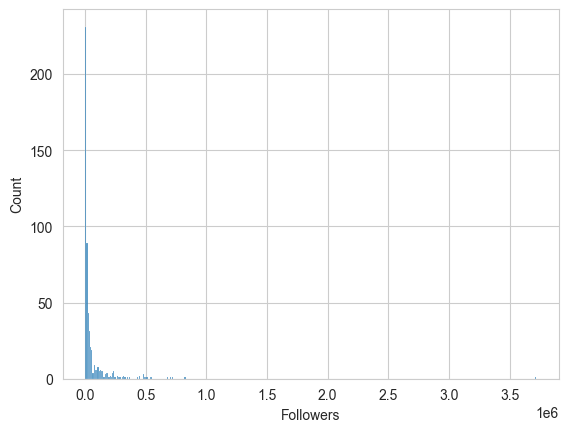

In [57]:
sns.histplot(data=remaining_Rows['Followers'])

## Dataset usado para los regresores

In [58]:
original_data['followers']=original_data.apply(lambda x:round(np.random.lognormal(mean=mu_fol, sigma=sigma_fol),0),axis=1)
original_data['Popularity']=original_data.apply(lambda x:round(np.random.lognormal(mean=mu_pop, sigma=sigma_pop),0),axis=1)
filtered_original=original_data.copy()
filtered_original.drop(columns=['status', 'year', 'id_album', 'title_album'], axis=1, inplace=True)


In [59]:
features_df=filtered_original[['band','score','active','transitions','followers','Popularity','count']]
features_df.rename(columns={'Popularity':'popularity'},inplace=True)
features_df

,band,score,active,transitions,followers,popularity,count
0,7,0.890000,True,False,897992.0,29.0,3
1,32,0.800000,False,False,3866.0,25.0,1
2,53,0.920000,True,False,27405.0,25.0,1
3,87,0.575000,False,False,64027.0,32.0,1
4,93,0.780811,True,False,2227.0,19.0,9
...,...,...,...,...,...,...,...
4437,37713,0.622500,False,True,70925.0,20.0,4
4438,37714,0.812976,False,True,4644.0,36.0,7
4439,37718,0.662267,True,True,16561.0,25.0,5
4440,37719,0.880000,True,True,9327.0,23.0,1


<Axes: xlabel='score', ylabel='popularity'>

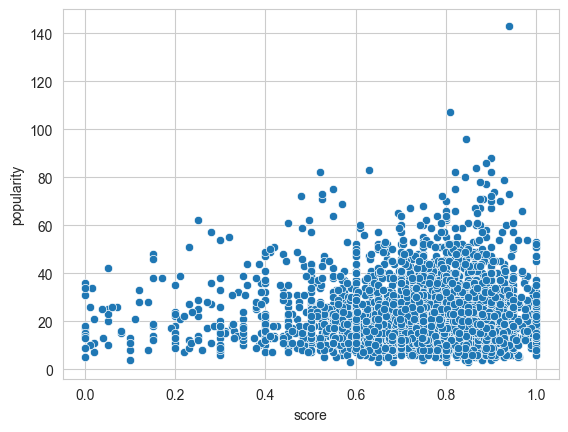

In [60]:
sns.scatterplot(data=features_df,x='score',y='popularity')

<Axes: xlabel='followers', ylabel='score'>

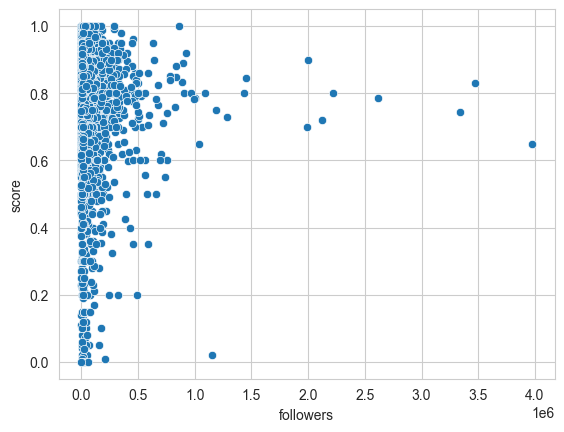

In [61]:
sns.scatterplot(data=features_df,x='followers',y='score')

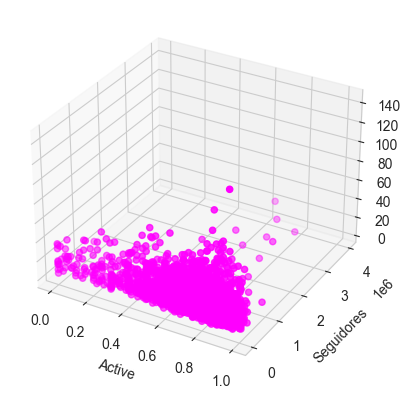

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Realizar el gráfico de dispersión
ax.scatter(features_df['score'], features_df['followers'], features_df['popularity'], c='magenta', marker='o')

# Añadir etiquetas
ax.set_xlabel('Active')
ax.set_ylabel('Seguidores')
ax.set_zlabel('score')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='score', ylabel='popularity'>

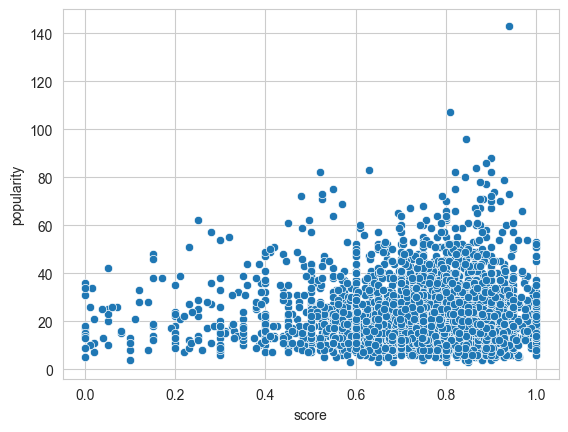

In [63]:
sns.scatterplot(data=features_df,x='score',y='popularity')

<Axes: xlabel='count', ylabel='score'>

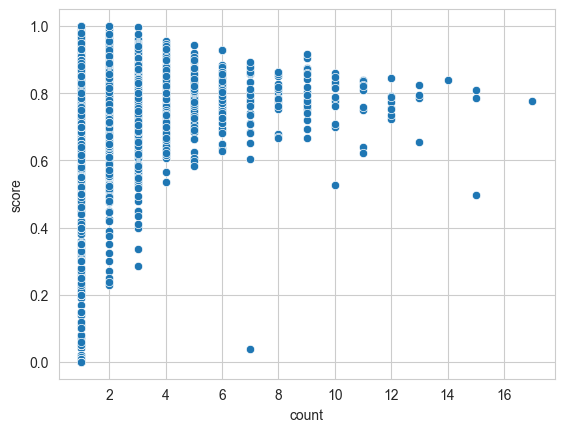

In [64]:
sns.scatterplot(data=features_df,x='count',y='score')

<Axes: xlabel='count', ylabel='followers'>

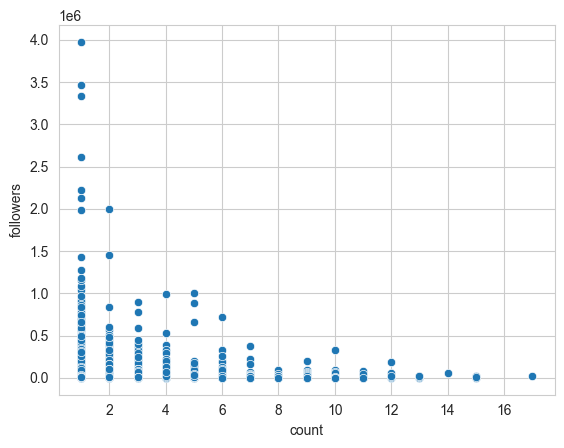

In [65]:
sns.scatterplot(data=features_df,x='count',y='followers')

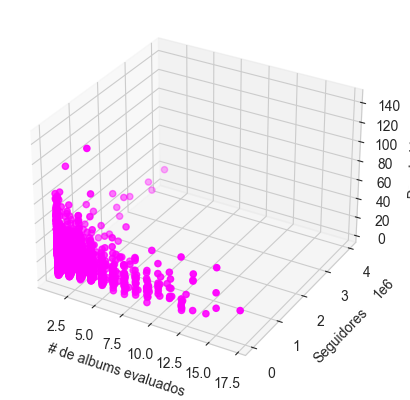

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Realizar el gráfico de dispersión
ax.scatter(features_df['count'], features_df['followers'], features_df['popularity'], c='magenta', marker='o')

# Añadir etiquetas
ax.set_xlabel('# de albums evaluados')
ax.set_ylabel('Seguidores')
ax.set_zlabel('Popularidad')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='count', ylabel='popularity'>

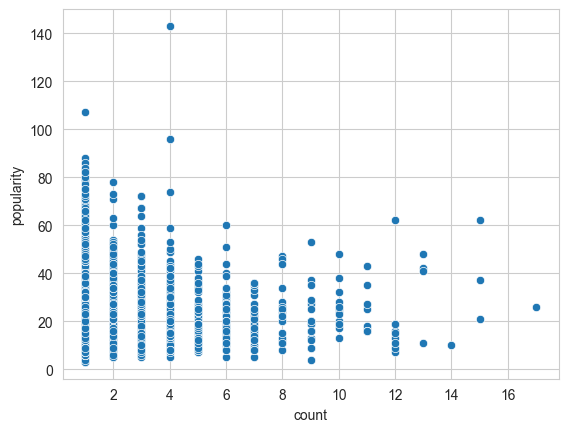

In [67]:
sns.scatterplot(data=features_df,x='count',y='popularity')

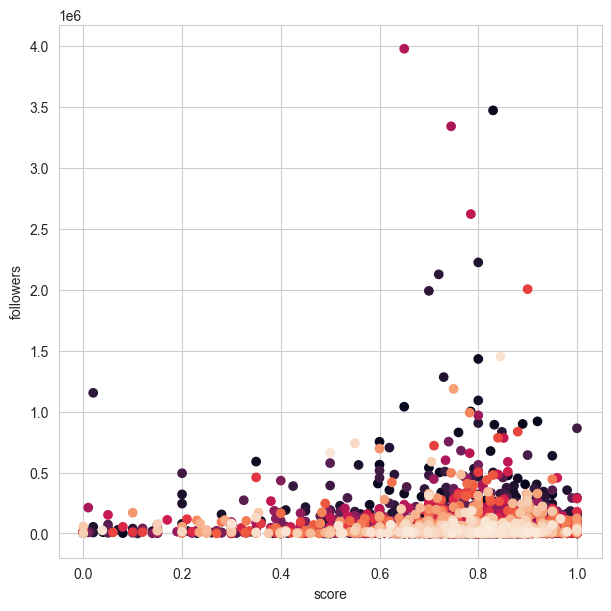

In [68]:
x=np.linspace(0,10,len(features_df))
y=2*x**2+np.random.randn(len(features_df))
col=x+y
fig, ax=plt.subplots(figsize=(6,6),layout='constrained')
ax.scatter(features_df['score'],features_df['followers'],c=col)
ax.set_xlabel('score')
ax.set_ylabel('followers')
plt.savefig('dist.png')
plt.show()

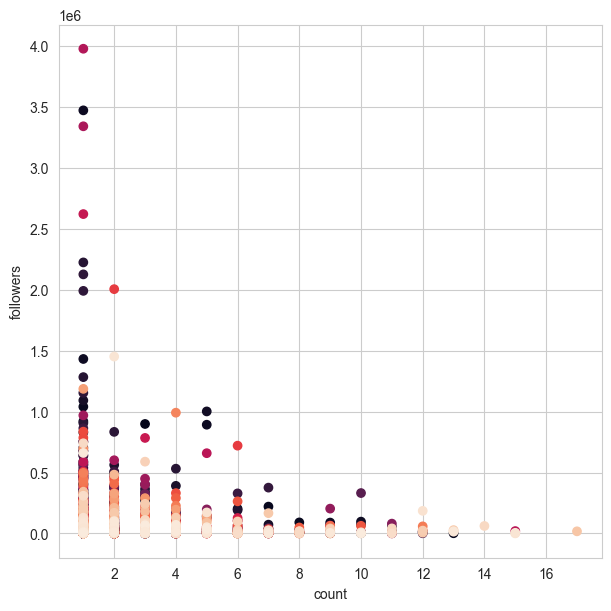

In [69]:
x=np.linspace(0,10,len(features_df))
y=2*x**2+np.random.randn(len(features_df))
col=x+y
fig, ax=plt.subplots(figsize=(6,6),layout='constrained')
ax.scatter(features_df['count'],features_df['followers'],c=col)
ax.set_xlabel('count')
ax.set_ylabel('followers')
plt.savefig('dist2.png')
plt.show()

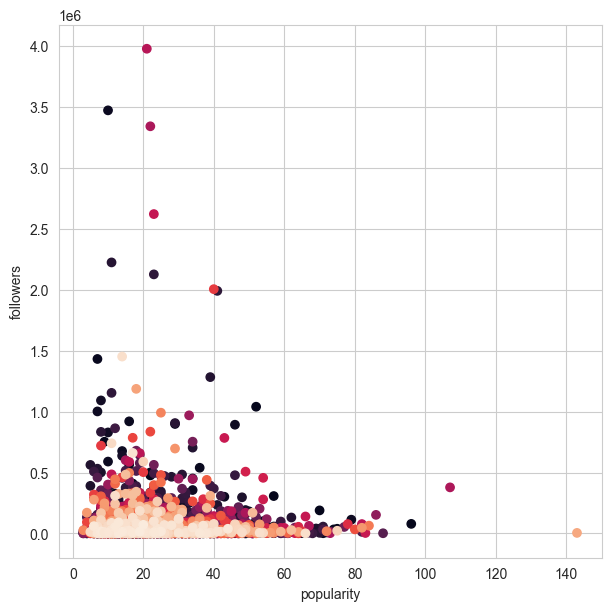

In [70]:
x=np.linspace(0,10,len(features_df))
y=2*x**2+np.random.randn(len(features_df))
col=x+y
fig, ax=plt.subplots(figsize=(6,6),layout='constrained')
ax.scatter(features_df['popularity'],features_df['followers'],c=col)
ax.set_xlabel('popularity')
ax.set_ylabel('followers')
plt.savefig('dist3.png')
plt.show()

In [71]:
features_df.columns

Index(['band', 'score', 'active', 'transitions', 'followers', 'popularity',
       'count'],
      dtype='object')

## Implementación de Random Forest con el dataset filtrado

In [72]:
features_df['active'] = features_df['active'].astype(int)
features_df['transitions'] = features_df['transitions'].astype(int)

# Preparar los datos
X = features_df[['score','active', 'transitions','popularity','count']]  # Variables independientes
y = features_df['followers']  # Variable dependiente

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
rf = RandomForestRegressor(n_estimators=300, random_state=42,min_samples_split= 2, min_samples_leaf= 4, max_depth= 10, bootstrap= True)
rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 154581.8083401927


In [73]:
r2_dt = r2_score(y_test,y_pred)
print(r2_dt)

-0.047856933959692594


## Mejora de Hiper-párametros

In [74]:
# Definir el espacio de búsqueda
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear el modelo base
rf = RandomForestRegressor()

# Crear la búsqueda aleatoria
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Número de combinaciones de parámetros a probar
    cv=3,        # Número de pliegues en la validación cruzada
    verbose=2,   # Controla la verbosidad: cuanto mayor es el número, más mensajes
    random_state=42,
    n_jobs=-1    # Número de trabajos para correr en paralelo (-1 significa usar todos los procesadores)
)

# Ajustar la búsqueda aleatoria
rf_random.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(rf_random.best_params_)

# Evaluar el mejor modelo encontrado
best_model = rf_random.best_estimator_


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}
